<a href="https://colab.research.google.com/github/krakenalt/CIFAR-10/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets
import torchvision.transforms as transforms
from google.colab import drive
from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline



In [ ]:
rcParams["axes.labelcolor"] = "w"
rcParams['figure.figsize'] = 15, 10
rcParams['axes.grid'] = True
params = {#"ytick.color" : "b",
          #"xtick.color" : "b",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)
random.seed(54)
np.random.seed(54)
torch.manual_seed(54)
torch.cuda.manual_seed(54)
torch.backends.cudnn.deterministic = True
np.set_printoptions(precision=3) 
warnings.filterwarnings("ignore")

In [ ]:
torch.cuda.is_available()

True

In [ ]:
%%time
train_transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation(15),
     transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])
test_transform = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])
train_ds = torchvision.datasets.CIFAR10('./',download=True, train=True,transform=train_transform)
no_transform_ds = torchvision.datasets.CIFAR10('./',download=True, train=True,transform=transforms.ToTensor())
test_ds = torchvision.datasets.CIFAR10('./',train=False,transform=test_transform)
X_train = torch.FloatTensor(train_ds.data) 
y_train = torch.LongTensor(train_ds.targets)
X_test = torch.FloatTensor(test_ds.data) 
y_test = torch.LongTensor(test_ds.targets)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=100,
                                          shuffle=True,pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=100,
                                         shuffle=False,pin_memory=True)
no_ts_loader = torch.utils.data.DataLoader(no_transform_ds, batch_size=100,
                                          shuffle=False,pin_memory=True)
w_ts_loader = torch.utils.data.DataLoader(train_ds, batch_size=100,
                                          shuffle=False,pin_memory=True)

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified
CPU times: user 4.04 s, sys: 1.44 s, total: 5.48 s
Wall time: 8.43 s


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
diction = dict(zip([i for i in range(10)],classes))

In [ ]:
show_ds = torchvision.datasets.CIFAR10('./',download=True, train=False)
X_show = test_ds.data[:100]
y_show = test_ds.targets[:100]
indexex = []
for i in range(10):
  indexex.append(y_show.index(i))

Files already downloaded and verified


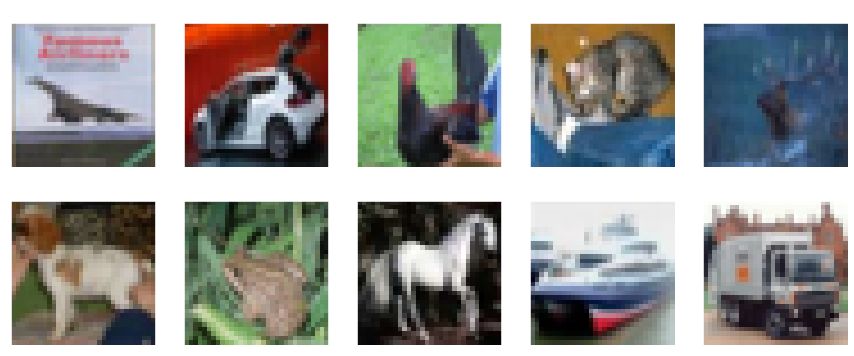

In [ ]:
X_show = [X_show[i] for i in indexex]
y_show = [y_show[i] for i in indexex]
fig = plt.figure(figsize=(15, 6)) 
for i in np.arange(10):
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[]) 
  plt.imshow(X_show[i])
  ax.set_title(f"{diction[y_show[i]]}",color="w")

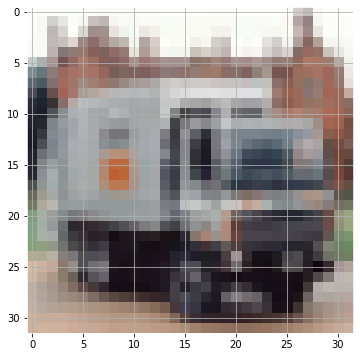

In [ ]:
rcParams['figure.figsize'] = (10,6)
X_show[9] = X_show[9] / 255.
plt.imshow(X_show[9])

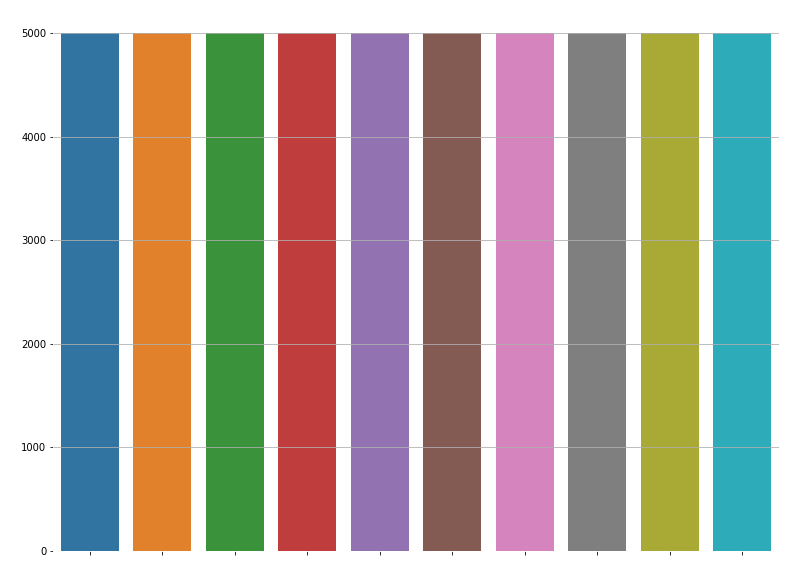

In [ ]:
fig, ax = plt.subplots(figsize=(13,10)) 
sns.countplot(y_train.numpy())
ax.set_xticklabels(classes,color="w")
plt.show()

In [ ]:
np.isnan(y_train).sum().item(), np.isnan(y_test).sum().item()

(0, 0)

In [ ]:
X_train, X_test = X_train.reshape(50000,32*32*3), X_test.reshape(10000,32*32*3)
X_train,y_train,X_test,y_test = X_train[:10000],y_train[:10000],X_test[:2000],y_test[:2000]

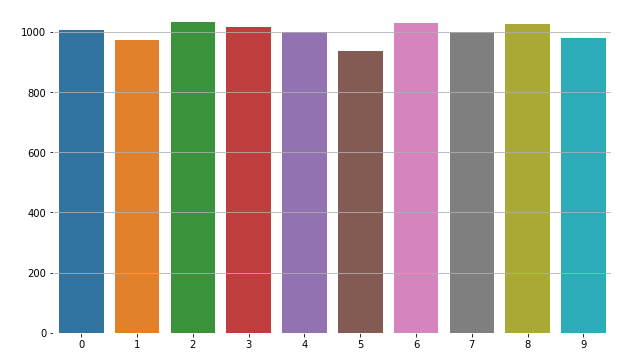

In [ ]:
sns.countplot(y_train.numpy())

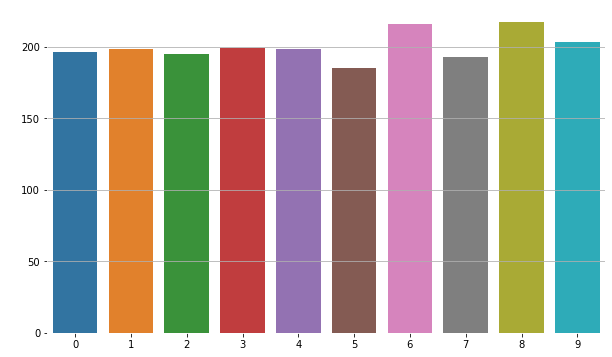

In [ ]:
sns.countplot(y_test.numpy())

# ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [ ]:
%%time
lr = make_pipeline(StandardScaler(),
    LogisticRegression(n_jobs=-1)
                  )
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print(f"Точность модели:{100 * accuracy_score(y_test,y_pred_lr):.2f}%")
acc_lr = np.round(100 * accuracy_score(y_test,y_pred_lr),3)

Точность модели:32.35%
CPU times: user 833 ms, sys: 213 ms, total: 1.05 s
Wall time: 26.9 s


CPU times: user 258 ms, sys: 206 ms, total: 464 ms
Wall time: 259 ms


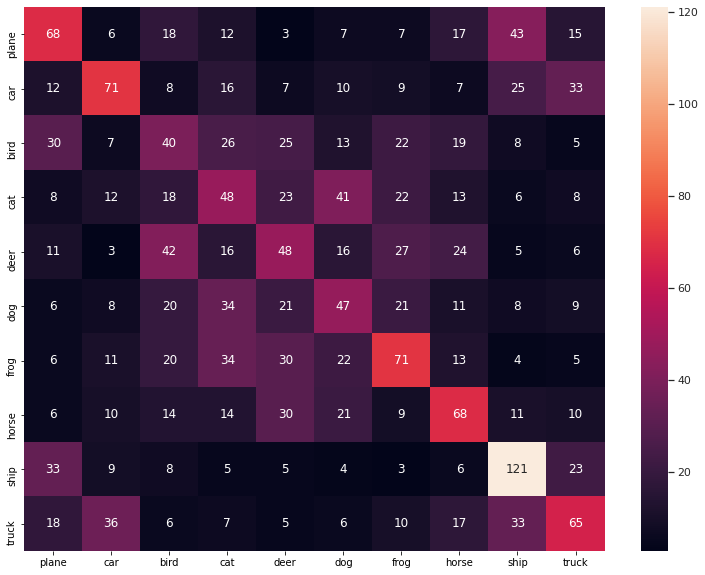

In [ ]:
%%time
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(13,10)) 
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(cf_matrix_lr,annot=True,fmt='g')
ax.set_xticklabels(classes);
ax.set_yticklabels(classes);

In [ ]:
unique, counts_test = np.unique(y_test, return_counts=True)
all_accuracies_lr = np.divide(np.diag(cf_matrix_lr),counts_test) * 100
all_accuracies_lr
for i in range(len(all_accuracies_lr)):
  print(f"Точность класса {classes[i]}: {all_accuracies_lr[i]:.2f} %")

Точность класса plane: 34.69 %
Точность класса car: 35.86 %
Точность класса bird: 20.51 %
Точность класса cat: 24.12 %
Точность класса deer: 24.24 %
Точность класса dog: 25.41 %
Точность класса frog: 32.87 %
Точность класса horse: 35.23 %
Точность класса ship: 55.76 %
Точность класса truck: 32.02 %


# K - ближайших соседей

In [ ]:
%%time
knn = make_pipeline(StandardScaler(), 
                    KNeighborsClassifier(n_neighbors=3,algorithm='brute')
                  )
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(f"Точность модели:{100 * accuracy_score(y_test,y_pred_knn):.2f}%")
acc_knn = np.round(100 * accuracy_score(y_test,y_pred_knn),3)

Точность модели:27.50%
CPU times: user 7.87 s, sys: 242 ms, total: 8.11 s
Wall time: 4.67 s


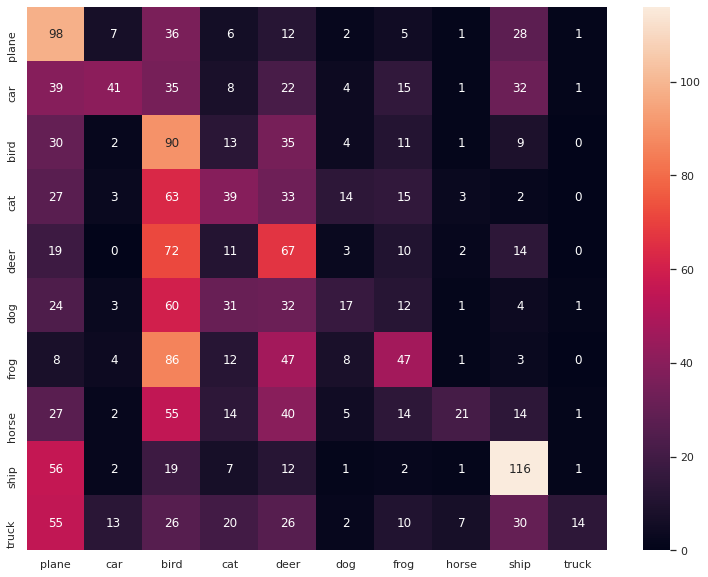

In [ ]:
cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(cf_matrix_knn,annot=True,fmt='g')
ax.set_xticklabels(classes);
ax.set_yticklabels(classes);

In [ ]:
all_accuracies_knn = np.divide(np.diag(cf_matrix_knn),counts_test) * 100
for i in range(len(all_accuracies_knn)):
  print(f"Точность класса {classes[i]}: {all_accuracies_knn[i]:.2f} %")

Точность класса plane: 50.00 %
Точность класса car: 20.71 %
Точность класса bird: 46.15 %
Точность класса cat: 19.60 %
Точность класса deer: 33.84 %
Точность класса dog: 9.19 %
Точность класса frog: 21.76 %
Точность класса horse: 10.88 %
Точность класса ship: 53.46 %
Точность класса truck: 6.90 %


# Случайный лес

In [ ]:
%%time
forest = make_pipeline(StandardScaler(),
                    RandomForestClassifier(random_state=30)
                   )
forest.fit(X_train,y_train)
y_pred_forest = forest.predict(X_test)
print(f"Точность модели:{100 * accuracy_score(y_test,y_pred_forest):.2f}%")
acc_forest = np.round(100 * accuracy_score(y_test,y_pred_forest),3)

Точность модели:42.15%
CPU times: user 44 s, sys: 65.3 ms, total: 44.1 s
Wall time: 44.1 s


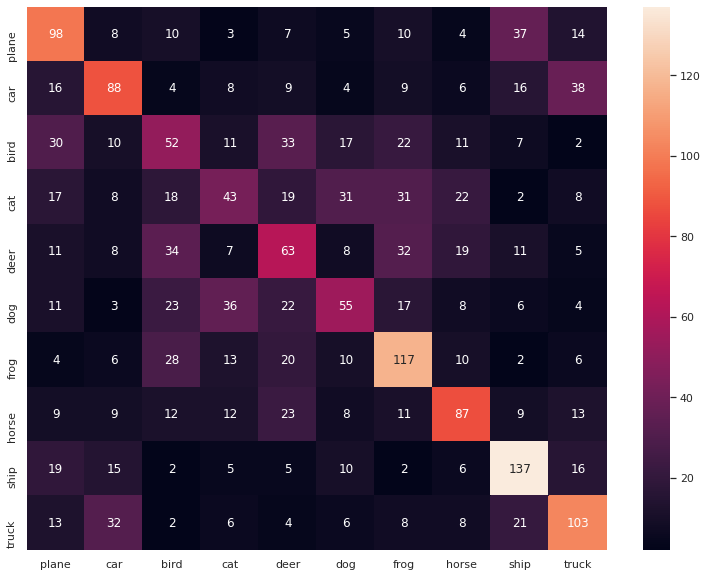

In [ ]:
cf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(cf_matrix_forest,annot=True,fmt='g')
ax.set_xticklabels(classes);
ax.set_yticklabels(classes);

In [ ]:
all_accuracies_forest = np.divide(np.diag(cf_matrix_forest),counts_test) * 100
for i in range(len(all_accuracies_forest)):
  print(f"Точность класса {classes[i]}: {all_accuracies_forest[i]:.2f} %")

Точность класса plane: 50.00 %
Точность класса car: 44.44 %
Точность класса bird: 26.67 %
Точность класса cat: 21.61 %
Точность класса deer: 31.82 %
Точность класса dog: 29.73 %
Точность класса frog: 54.17 %
Точность класса horse: 45.08 %
Точность класса ship: 63.13 %
Точность класса truck: 50.74 %


# Naive Bayes

In [ ]:
%%time
nb = make_pipeline(StandardScaler(),
                   GaussianNB()
                  )
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print(f"Точность модели:{100 * accuracy_score(y_test,y_pred_nb):.2f}%")
acc_nb = np.round(100 * accuracy_score(y_test,y_pred_nb),3)

Точность модели:29.15%
CPU times: user 1.38 s, sys: 16.9 ms, total: 1.4 s
Wall time: 1.4 s


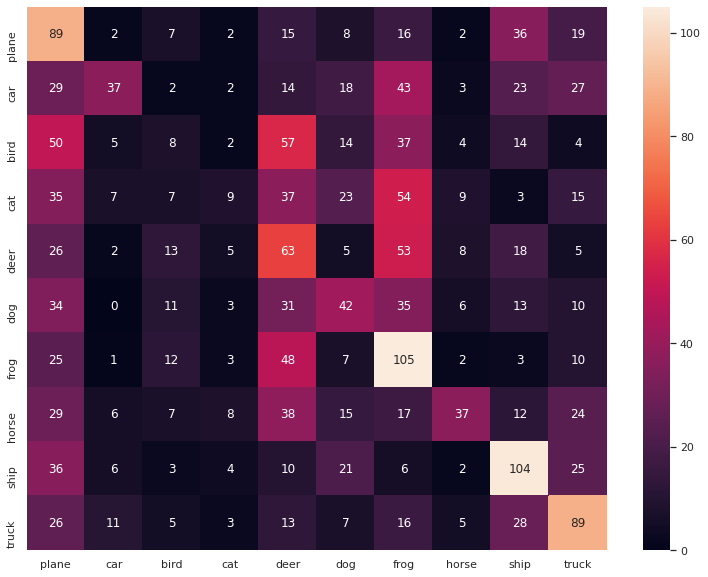

In [ ]:
cf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(cf_matrix_nb,annot=True,fmt='g')
ax.set_xticklabels(classes);
ax.set_yticklabels(classes);

In [ ]:
all_accuracies_nb = np.divide(np.diag(cf_matrix_nb),counts_test) * 100
for i in range(len(all_accuracies_nb)):
  print(f"Точность класса {classes[i]}: {all_accuracies_nb[i]:.2f} %")

Точность класса plane: 45.41 %
Точность класса car: 18.69 %
Точность класса bird: 4.10 %
Точность класса cat: 4.52 %
Точность класса deer: 31.82 %
Точность класса dog: 22.70 %
Точность класса frog: 48.61 %
Точность класса horse: 19.17 %
Точность класса ship: 47.93 %
Точность класса truck: 43.84 %


# SVM

In [ ]:
%%time
svect = make_pipeline(StandardScaler(),
                    LinearSVC(max_iter=100)
                   )
svect.fit(X_train,y_train)
y_pred_svect = svect.predict(X_test)
print(f"Точность модели:{100 * accuracy_score(y_test,y_pred_svect):.2f}%")
acc_svect = np.round(100 * accuracy_score(y_test,y_pred_svect),3)

Точность модели:27.55%
CPU times: user 1min 27s, sys: 209 ms, total: 1min 27s
Wall time: 1min 27s


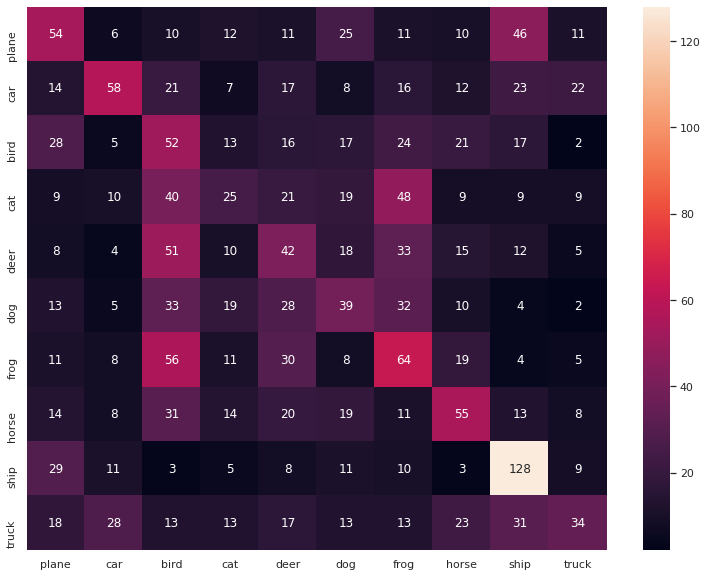

In [ ]:
cf_matrix_svect = confusion_matrix(y_test, y_pred_svect)
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(cf_matrix_svect,annot=True,fmt='g')
ax.set_xticklabels(classes);
ax.set_yticklabels(classes);

In [ ]:
all_accuracies_svect = np.divide(np.diag(cf_matrix_svect),counts_test) * 100
for i in range(len(all_accuracies_nb)):
  print(f"Точность класса {classes[i]}: {all_accuracies_svect[i]:.2f} %")

Точность класса plane: 27.55 %
Точность класса car: 29.29 %
Точность класса bird: 26.67 %
Точность класса cat: 12.56 %
Точность класса deer: 21.21 %
Точность класса dog: 21.08 %
Точность класса frog: 29.63 %
Точность класса horse: 28.50 %
Точность класса ship: 58.99 %
Точность класса truck: 16.75 %


# MLP CLASSIFIER

In [ ]:
%%time
mlp = make_pipeline(StandardScaler(), 
                    MLPClassifier(random_state=42)
)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print(f"Точность модели:{100 * accuracy_score(y_test,y_pred_mlp):.2f}%")
acc_mlp = np.round(100 * accuracy_score(y_test,y_pred_mlp),3)

Точность модели:41.90%
CPU times: user 2min 4s, sys: 44 s, total: 2min 48s
Wall time: 1min 25s


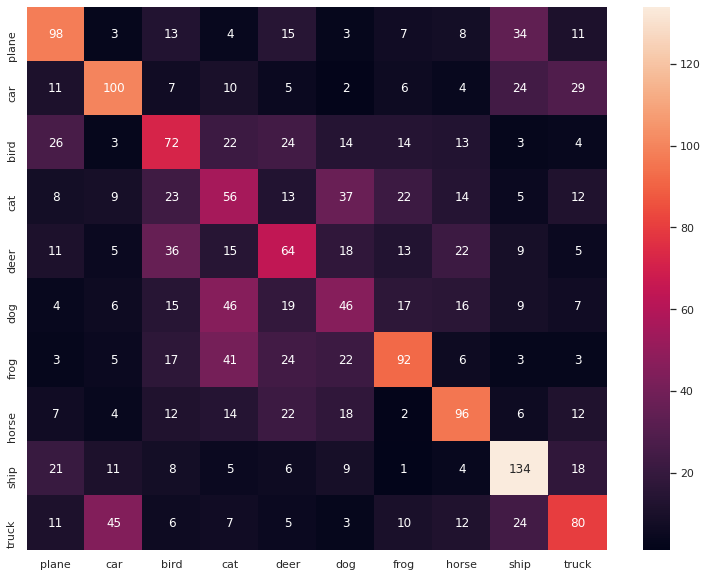

In [ ]:
cf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(cf_matrix_mlp,annot=True,fmt='g')
ax.set_xticklabels(classes);
ax.set_yticklabels(classes);

In [ ]:
all_accuracies_mlp = np.divide(np.diag(cf_matrix_mlp),counts_test) * 100 
all_accuracies_mlp
for i in range(len(all_accuracies_mlp)):
  print(f"Точность класса {classes[i]}: {all_accuracies_mlp[i]:.2f} %")

Точность класса plane: 50.00 %
Точность класса car: 50.51 %
Точность класса bird: 36.92 %
Точность класса cat: 28.14 %
Точность класса deer: 32.32 %
Точность класса dog: 24.86 %
Точность класса frog: 42.59 %
Точность класса horse: 49.74 %
Точность класса ship: 61.75 %
Точность класса truck: 39.41 %


# CUSTOM NEURAL

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

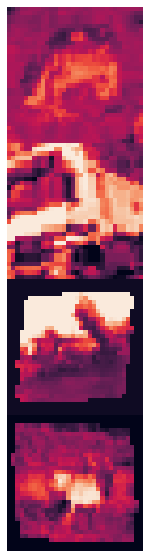

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
def show_dataset(dataset, n=1):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(len(dataset)))) 
  plt.imshow(img)
  plt.axis('off')

dataiter = iter(w_ts_loader)
images, labels = dataiter.next()
show_dataset(images[:4])

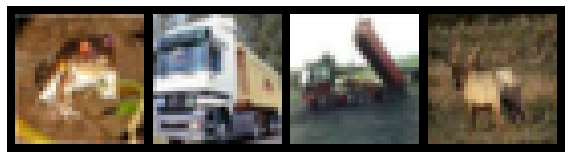

['frog', 'truck', 'truck', 'deer']


In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.rcParams['figure.figsize'] = (10, 3)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

dataiter = iter(no_ts_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print([diction[j] for j in labels[:4].view(-1).numpy()])

In [ ]:
del no_ts_loader
del w_ts_loader
del no_transform_ds

In [ ]:
class Net(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(in_channels=3,out_channels=16, kernel_size=3,stride=1, padding=1) 
      self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1) 
      self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
      self.fc1 = nn.Linear(4*4*64, 500)
      self.dropout1 = nn.Dropout(0.5)
      self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv2(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv3(x))
      x = F.max_pool2d(x, 2, 2)
      x = x.view(-1, 4*4*64)
      x = F.relu(self.fc1(x))
      x = self.dropout1(x)
      x = self.fc2(x)
      return x
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [ ]:
%%time
epochs = 20
running_loss_history = []
running_corrects_history = []
test_running_loss_history = []
test_running_corrects_history = []

for e in range(epochs): 
  
  running_loss = 0.0
  running_corrects = 0.0
  test_running_loss = 0.0
  test_running_corrects = 0.0
  
  for inputs, labels in train_loader:
    inputs = inputs.to(device) 
    labels = labels.to(device)
    outputs = model(inputs) 
    loss = criterion(outputs, labels)  
    
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data) 

  else:
    with torch.no_grad(): 
      for test_inputs, test_labels in test_loader:
        test_inputs = test_inputs.to(device)
        test_labels = test_labels.to(device)
        test_outputs = model(test_inputs)
        test_loss = criterion(test_outputs, test_labels)
        
        _, test_preds = torch.max(test_outputs, 1)
        test_running_loss += test_loss.item()
        test_running_corrects += torch.sum(test_preds == test_labels.data)
      
    epoch_loss = running_loss/len(train_loader) 
    epoch_acc = running_corrects.float()/ len(train_loader) 
    running_loss_history.append(epoch_loss) 
    running_corrects_history.append(epoch_acc)
    
    test_epoch_loss = test_running_loss/len(test_loader)
    test_epoch_acc = test_running_corrects.float()/ len(test_loader)
    test_running_loss_history.append(test_epoch_loss)
    test_running_corrects_history.append(test_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('test loss: {:.4f}, test acc {:.4f} '.format(test_epoch_loss, test_epoch_acc.item()))
print("Обучение завершено")

epoch : 1
training loss: 1.7153, acc 37.2880 
test loss: 1.4182, test acc 48.2600 
epoch : 2
training loss: 1.4142, acc 49.0860 
test loss: 1.2431, test acc 55.6200 
epoch : 3
training loss: 1.2881, acc 53.9380 
test loss: 1.2331, test acc 56.4500 
epoch : 4
training loss: 1.2123, acc 56.9500 
test loss: 1.0654, test acc 61.8300 
epoch : 5
training loss: 1.1494, acc 59.5660 
test loss: 1.0026, test acc 64.4000 
epoch : 6
training loss: 1.0949, acc 61.3260 
test loss: 1.0318, test acc 63.0200 
epoch : 7
training loss: 1.0595, acc 62.8460 
test loss: 1.0025, test acc 64.6100 
epoch : 8
training loss: 1.0264, acc 63.8720 
test loss: 0.9539, test acc 66.7600 
epoch : 9
training loss: 0.9997, acc 64.9680 
test loss: 0.9254, test acc 67.5900 
epoch : 10
training loss: 0.9791, acc 65.8040 
test loss: 0.9112, test acc 67.9900 
epoch : 11
training loss: 0.9559, acc 66.4280 
test loss: 0.8717, test acc 69.4600 
epoch : 12
training loss: 0.9409, acc 67.1920 
test loss: 0.8569, test acc 70.3100 
e

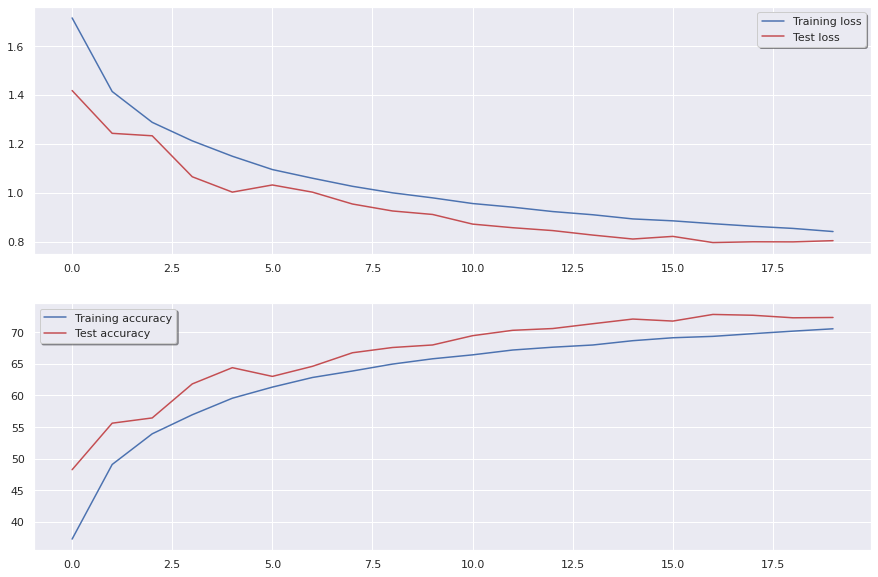

In [ ]:
def loss_acc_plt(loss1,loss2,acc1,acc2):
  plt.rcParams['figure.figsize'] = (15, 10)
  plt.rcParams["axes.labelcolor"] = "w"
  plt.rcParams["axes.edgecolor"] = "w"
  fig, ax = plt.subplots(2,1)
  ax[0].plot(loss1, color='b', label="Training loss")
  ax[0].plot(loss2, color='r', label="Test loss")
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(acc1, color='b', label="Training accuracy")
  ax[1].plot(acc2, color='r',label="Test accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

loss_acc_plt(running_loss_history,test_running_loss_history,running_corrects_history,test_running_corrects_history)


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Точность на 10000 тестовых изображений: %d %%' % (
    100 * correct / total))
acc_custom = np.round(100 * correct / total,3)

Точность на 10000 тестовых изображений: 72 %


In [ ]:
all_accuracies_custom = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Точность класса %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    all_accuracies_custom.append(100 * class_correct[i] / class_total[i])
all_accuracies_custom = np.array(all_accuracies_custom)

Точность класса plane : 84 %
Точность класса   car : 78 %
Точность класса  bird : 71 %
Точность класса   cat : 48 %
Точность класса  deer : 69 %
Точность класса   dog : 56 %
Точность класса  frog : 75 %
Точность класса horse : 90 %
Точность класса  ship : 70 %
Точность класса truck : 75 %


In [ ]:
rcParams['figure.figsize'] = 5,2

In [ ]:
def convert(tensor):  
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

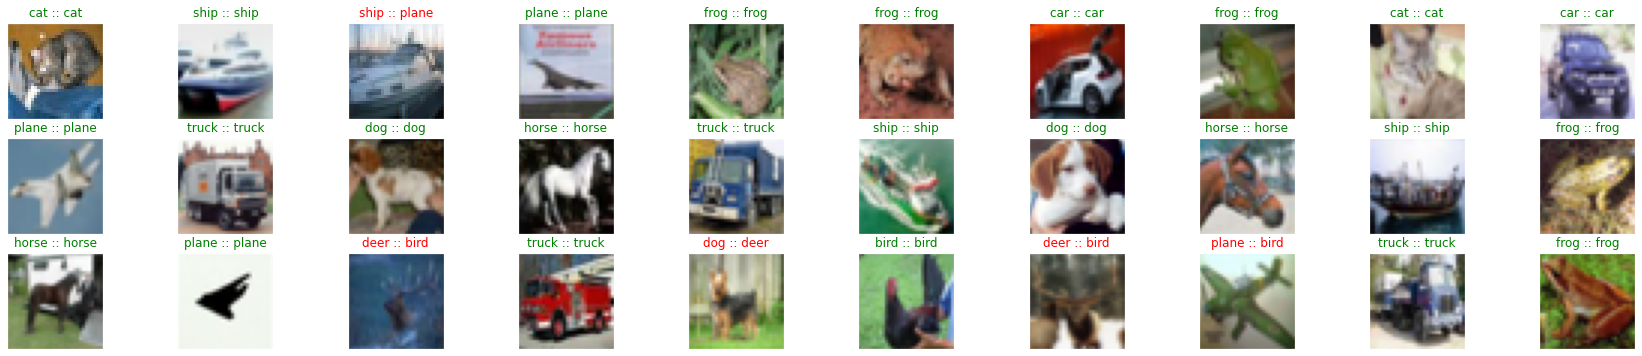

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)
fig = plt.figure(figsize=(30, 6)) 
for i in np.arange(30):
  ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[]) 
  plt.imshow(convert(images[i]))
  ax.set_title(f"{diction[labels[i].item()]} :: {diction[preds[i].item()]}",color=("green" if preds[i]==labels[i] else "red"))

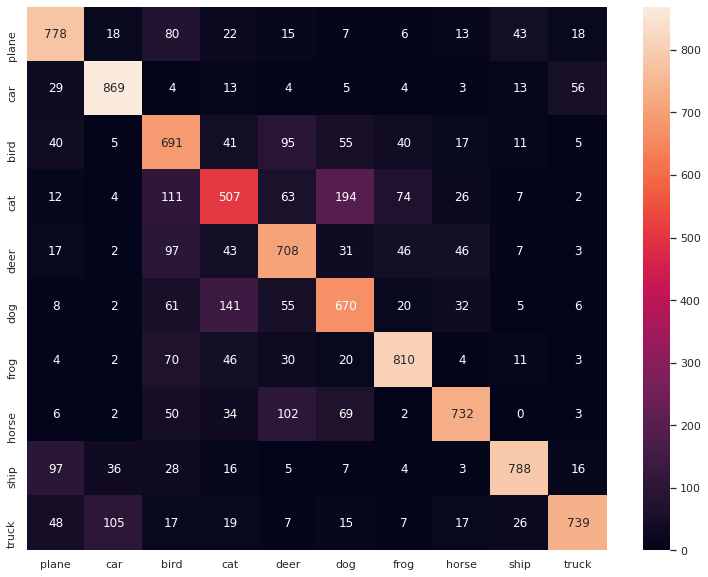

In [ ]:
preds = []
lbl = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        preds.append(torch.unsqueeze(predicted.cpu(),0).numpy())
        lbl.append(torch.unsqueeze(labels.cpu(),0).numpy())
preds = np.array(preds)
preds = preds.reshape(10000)
lbl = np.array(lbl)
lbl = lbl.reshape(10000)
cf_matrix_net = confusion_matrix(lbl,preds)
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(cf_matrix_net,annot=True,fmt='g')
ax.set_xticklabels(classes);
ax.set_yticklabels(classes);

In [ ]:
import os
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks/MY_IMAGES"
data_dir = "/content/drive/My Drive/Colab Notebooks/MY_IMAGES"
all_files = os.listdir(data_dir)

Mounted at /content/drive
_5QNYzJ3q1g.jpg  Hwk5WKIqJ44.jpg  qKPqS2m1g_4.jpg  u7ZBeHConDw.jpg
8a-9IEIJl4E.jpg  jJEmmEhr5CA.jpg  QsSdWJh7QrU.jpg  UF_6lAfOkpU.jpg
8d-c4yrkHU4.jpg  jq8JWuFw6U.png   QTDSg1uOWsw.jpg  uKFyzDNmiCw.jpg
AAAAAA.png	 KNn1LqBWQqQ.jpg  rwpZKnUM-DM.jpg  uSXALP3G_lQ.jpg
aJkSoaODpfE.jpg  o7COOfz9k3M.jpg  rymA23ALBH8.jpg  Uz1AF9nGZpM.jpg
aSCeS1RNo9c.jpg  oL7HGnk2Drg.jpg  t6_UTiQH6zk.jpg  XNSrtvuJGWg.jpg
DbWKZke4Ym0.jpg  OpNITigFFRY.jpg  tIIkwzRtIck.jpg  XVYq8qnoD5E.jpg
Fht9DcRXsFU.jpg  p13tSR12D8g.jpg  tjDw4Y5ih0w.jpg
Fxf6qBffKrQ.jpg  pPDcQ4pfno8.jpg  TLZepqhIF_c.jpg


In [ ]:
def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([file for file in all_files])
    return image_files
dataset = loadImages(data_dir)
dataset

['8a-9IEIJl4E.jpg',
 '8d-c4yrkHU4.jpg',
 'AAAAAA.png',
 'DbWKZke4Ym0.jpg',
 'Fht9DcRXsFU.jpg',
 'Fxf6qBffKrQ.jpg',
 'Hwk5WKIqJ44.jpg',
 'KNn1LqBWQqQ.jpg',
 'OpNITigFFRY.jpg',
 'QTDSg1uOWsw.jpg',
 'QsSdWJh7QrU.jpg',
 'TLZepqhIF_c.jpg',
 'UF_6lAfOkpU.jpg',
 'Uz1AF9nGZpM.jpg',
 'XNSrtvuJGWg.jpg',
 'XVYq8qnoD5E.jpg',
 '_5QNYzJ3q1g.jpg',
 'aJkSoaODpfE.jpg',
 'aSCeS1RNo9c.jpg',
 'jJEmmEhr5CA.jpg',
 'jq8JWuFw6U.png',
 'o7COOfz9k3M.jpg',
 'oL7HGnk2Drg.jpg',
 'p13tSR12D8g.jpg',
 'pPDcQ4pfno8.jpg',
 'qKPqS2m1g_4.jpg',
 'rwpZKnUM-DM.jpg',
 'rymA23ALBH8.jpg',
 't6_UTiQH6zk.jpg',
 'tIIkwzRtIck.jpg',
 'tjDw4Y5ih0w.jpg',
 'u7ZBeHConDw.jpg',
 'uKFyzDNmiCw.jpg',
 'uSXALP3G_lQ.jpg']

In [ ]:
data_dir = "/content/drive/My Drive/Colab Notebooks"
image_datasets = torchvision.datasets.ImageFolder(root=data_dir, transform=test_transform)
image_datasets
load_images = torch.utils.data.DataLoader(image_datasets,batch_size=34,
                                          shuffle=False)
load_images.dataset

Dataset ImageFolder
    Number of datapoints: 34
    Root location: /content/drive/My Drive/Colab Notebooks
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
cls = ["dog","dog","cat","bird","dog","cat","dog",
       "cat","bird","dog","dog","cat","dog","dog",
       "bird","dog","cat","cat","cat","bird","cat",
       "dog","cat","dog","dog","cat","cat","cat",
       "cat","dog","cat","cat","cat","cat"
]
for i in range(len(cls)):
  for key,value in diction.items():
    if cls[i] == value:
      cls[i] = key
      break

cls = np.array(cls)

In [ ]:
acc = 0
best_preds = None
for i in range(10):
  correct = 0
  with torch.no_grad():
    img_iter = iter(load_images)
    my_img,_ = img_iter.next()
    my_img = my_img.to(device)
    output = model(my_img)
    _,my_img_preds = torch.max(output.data, 1)
    correct += (my_img_preds.cpu().numpy() == cls).sum()
    if correct / 34 * 100 > acc:
      best_preds = my_img_preds.cpu().numpy()
      acc = correct / 34 * 100
print(f"{acc:.2f} %")

44.12 %


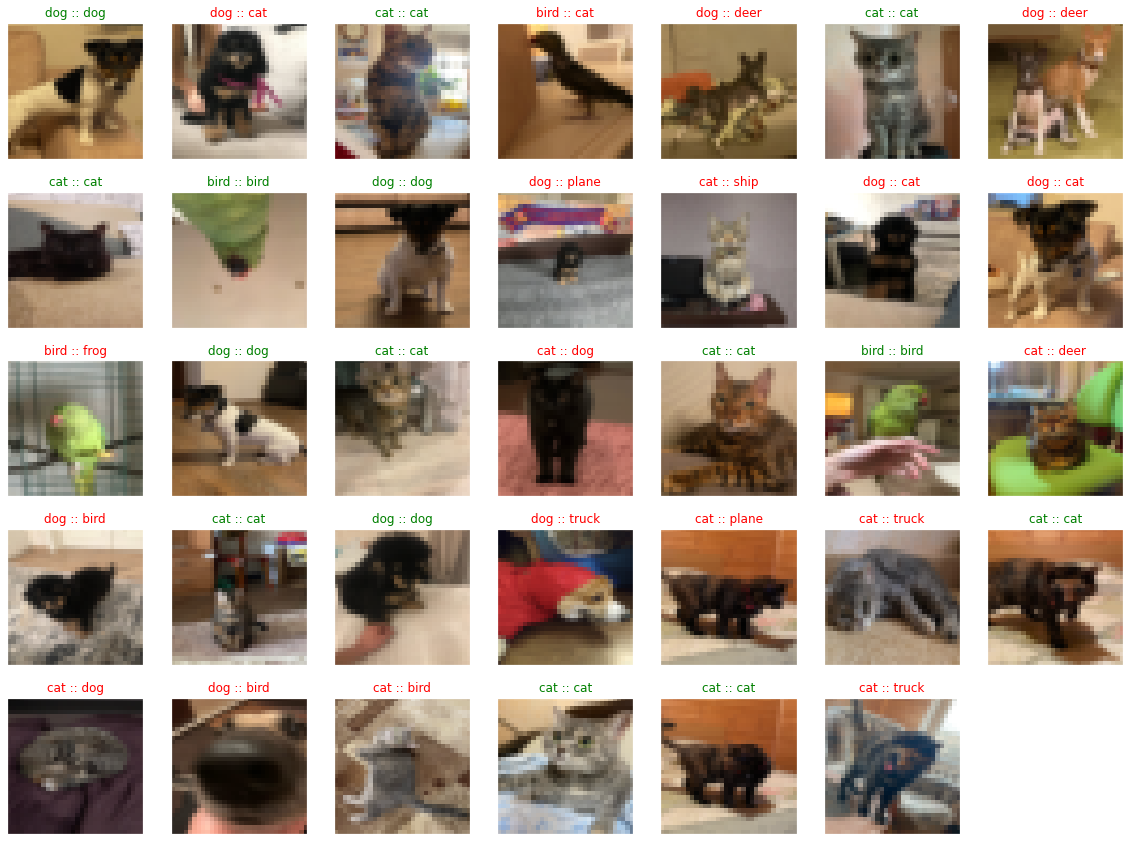

In [ ]:
fig1 = plt.figure(figsize=(20, 15)) 
for i in np.arange(34):
  ax = fig1.add_subplot(5, 7, i+1, xticks=[], yticks=[]) 
  plt.imshow(convert(my_img[i]))
  ax.set_title(f"{diction[cls[i]]} :: {diction[best_preds[i]]}",color=("green" if diction[cls[i]]==diction[best_preds[i]] else "red"))

In [ ]:
all_needed_data = np.array([np.array(classes),all_accuracies_lr.round(3),
                            all_accuracies_knn.round(3),all_accuracies_forest.round(3),
                            all_accuracies_nb.round(3),all_accuracies_svect.round(3),
                            all_accuracies_mlp.round(3),all_accuracies_custom.round(3)])
df = pd.DataFrame(np.transpose(all_needed_data),
                            columns=["Classes/total_acc",'LogReg','KNN','Forest','NB','LinearSVM',"MLP","Custom Net"])
pd.options.display.float_format = "{:,.2f}".format
df.loc[10] = np.array(["total_accuracy",acc_lr,acc_knn,acc_forest,acc_nb,acc_svect,acc_mlp,acc_custom])
df.round(2)

,Classes/total_acc,LogReg,KNN,Forest,NB,LinearSVM,MLP,Custom Net
0,plane,34.694,50.0,50.0,45.408,27.551,50.0,84.091
1,car,35.859,20.707,44.444,18.687,29.293,50.505,78.125
2,bird,20.513,46.154,26.667,4.103,26.667,36.923,71.053
3,cat,24.121,19.598,21.608,4.523,12.563,28.141,48.837
4,deer,24.242,33.838,31.818,31.818,21.212,32.323,69.388
5,dog,25.405,9.189,29.73,22.703,21.081,24.865,56.25
6,frog,32.87,21.759,54.167,48.611,29.63,42.593,75.472
7,horse,35.233,10.881,45.078,19.171,28.497,49.741,90.625
8,ship,55.76,53.456,63.134,47.926,58.986,61.751,70.833
9,truck,32.02,6.897,50.739,43.842,16.749,39.409,75.862


In [ ]:
conv_layers = [model.conv1,model.conv2,model.conv3]
weights = []
for i in conv_layers:
  weights.append(i.weight.cpu().detach().numpy())
weights = np.array(weights)

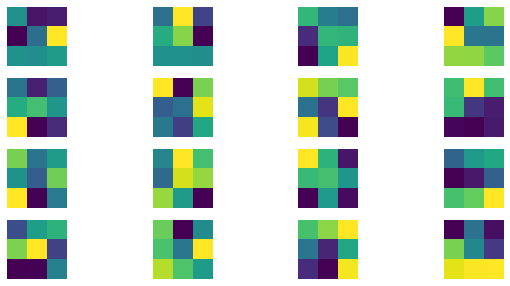

In [ ]:
plt.figure(figsize=(10, 5))
for i, filter in enumerate(weights[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(filter[0, :, :], cmap='viridis')
    plt.axis('off')
plt.show()

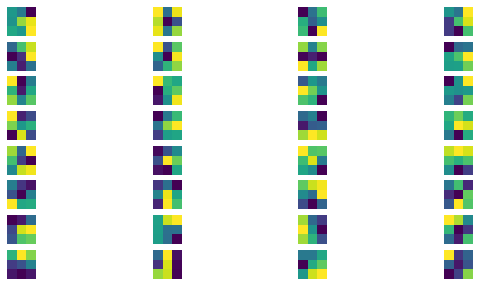

In [ ]:
plt.figure(figsize=(10, 5))
for i, filter in enumerate(weights[1]):
    plt.subplot(8, 4, i+1)
    plt.imshow(filter[0, :, :], cmap='viridis')
    plt.axis('off')
plt.show()

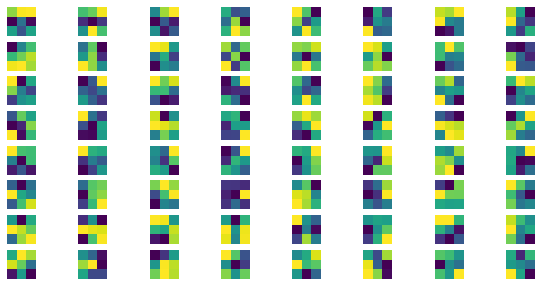

In [ ]:
plt.figure(figsize=(10, 5))
for i, filter in enumerate(weights[2]):
    plt.subplot(8, 8, i+1)
    plt.imshow(filter[0, :, :], cmap='viridis')
    plt.axis('off')
plt.show()

In [ ]:
img_example = images[78].reshape(1,3,32,32)
results = [conv_layers[0](img_example)]
results.append(F.max_pool2d(F.relu(results[-1]), 2, 2))
for i in range(1,len(conv_layers)):
  results.append(conv_layers[i](results[-1]))
  results.append(F.max_pool2d(F.relu(results[-1]), 2, 2))


torch.Size([16, 32, 32])


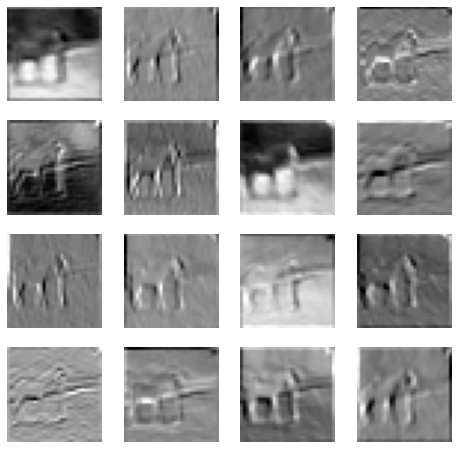

In [ ]:
plt.figure(figsize=(8, 8))
layer_viz = results[0][0, :, :, :]
layer_viz = layer_viz.data
print(layer_viz.size())
for i, filter in enumerate(layer_viz):
    plt.subplot(4, 4, i + 1)
    plt.imshow(filter.cpu(), cmap='gray')
    plt.axis("off")

torch.Size([32, 16, 16])


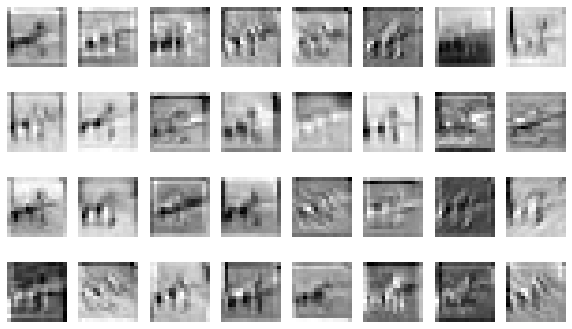

In [ ]:
plt.figure(figsize=(10, 6))
layer_viz = results[2][0, :, :, :]
layer_viz = layer_viz.data
print(layer_viz.size())
for i, filter in enumerate(layer_viz):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filter.cpu(), cmap='gray')
    plt.axis("off")

torch.Size([64, 8, 8])


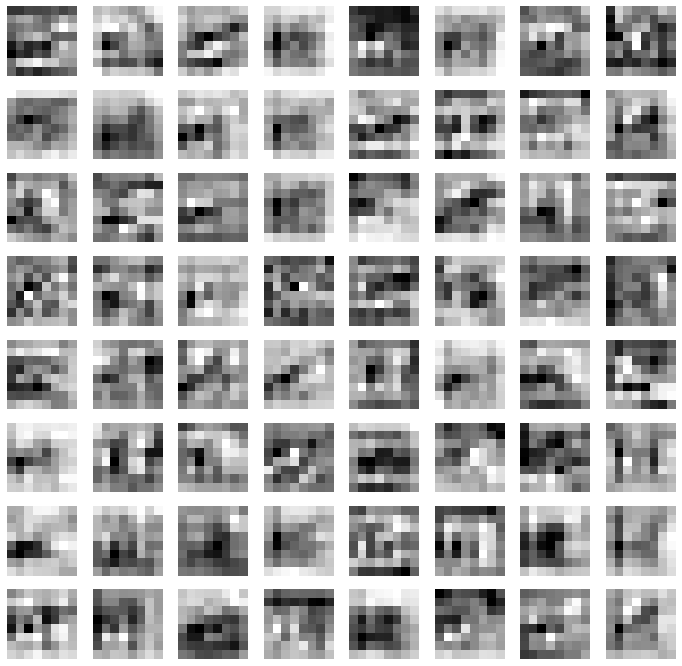

In [ ]:
plt.figure(figsize=(12, 12))
layer_viz = results[4][0, :, :, :]
layer_viz = layer_viz.data
print(layer_viz.size())
for i, filter in enumerate(layer_viz):
    plt.subplot(8, 8, i + 1)
    plt.imshow(filter.cpu(), cmap='gray')
    plt.axis("off")

(-0.5, 31.5, 31.5, -0.5)

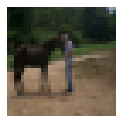

In [ ]:
plt.imshow(convert(images[78]))
plt.axis('off')

In [ ]:
new_ds_ts = transforms.Compose(
    [transforms.Resize((1024, 1024)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])
new_ds = torchvision.datasets.ImageFolder(root=data_dir, transform=new_ds_ts)
load_new_ds = torch.utils.data.DataLoader(new_ds,batch_size=34,
                                          shuffle=False)
load_new_ds.dataset

Dataset ImageFolder
    Number of datapoints: 34
    Root location: /content/drive/My Drive/Colab Notebooks
    StandardTransform
Transform: Compose(
               Resize(size=(1024, 1024), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

(-0.5, 1023.5, 1023.5, -0.5)

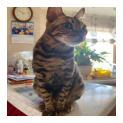

In [ ]:
with torch.no_grad():
  img_iter = iter(load_new_ds)
  my_img,_ = img_iter.next()

plt.imshow(convert(my_img[2]))
plt.axis("off")

In [ ]:
check_img = my_img[2].reshape(1,3,1024,1024).to(device)
results = [conv_layers[0](check_img)]
results.append(F.max_pool2d(F.relu(results[-1]), 2, 2))
for i in range(1,len(conv_layers)):
  results.append(conv_layers[i](results[-1]))
  results.append(F.max_pool2d(F.relu(results[-1]), 2, 2))

torch.Size([16, 1024, 1024])


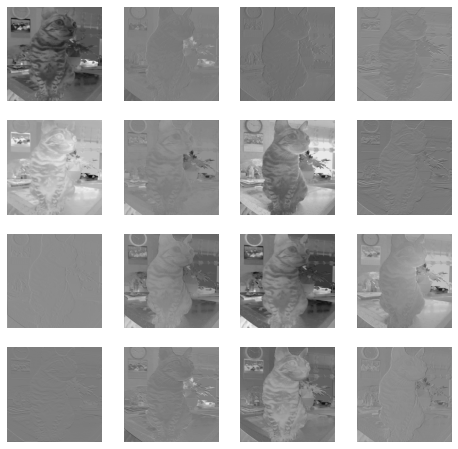

In [ ]:
plt.figure(figsize=(8, 8))
layer_viz = results[0][0, :, :, :]
layer_viz = layer_viz.data
print(layer_viz.size())
for i, filter in enumerate(layer_viz):
    plt.subplot(4, 4, i + 1)
    plt.imshow(filter.cpu(), cmap='gray')
    plt.axis("off")

torch.Size([32, 512, 512])


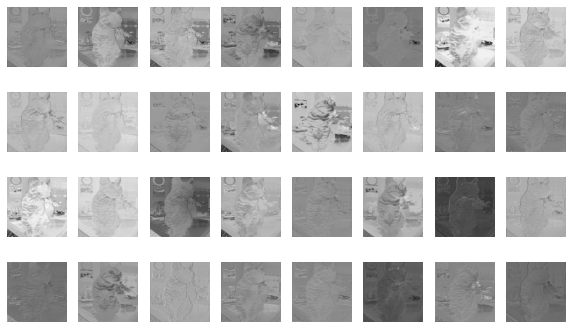

In [ ]:
plt.figure(figsize=(10, 6))
layer_viz = results[2][0, :, :, :]
layer_viz = layer_viz.data
print(layer_viz.size())
for i, filter in enumerate(layer_viz):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filter.cpu(), cmap='gray')
    plt.axis("off")

torch.Size([64, 256, 256])


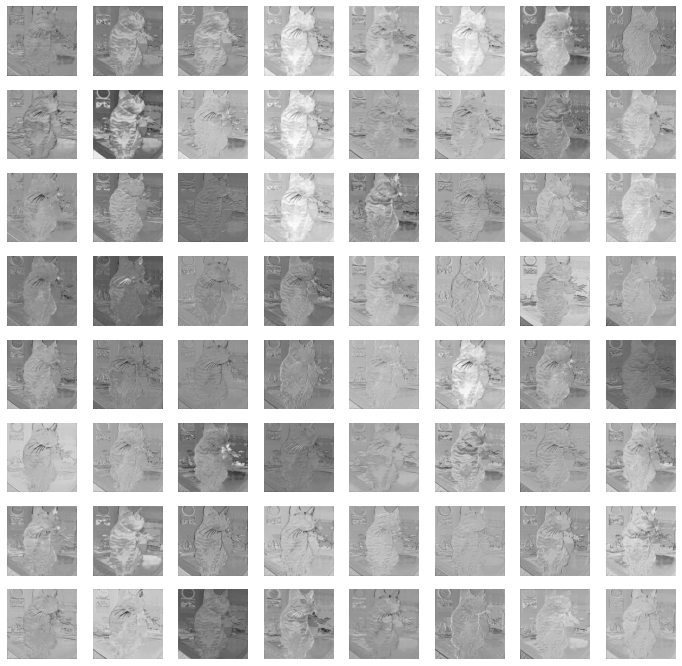

In [ ]:
plt.figure(figsize=(12, 12))
layer_viz = results[4][0, :, :, :]
layer_viz = layer_viz.data
print(layer_viz.size())
for i, filter in enumerate(layer_viz):
    plt.subplot(8, 8, i + 1)
    plt.imshow(filter.cpu(), cmap='gray')
    plt.axis("off")

In [ ]:
check_img2 = my_img[6].reshape(1,3,1024,1024).to(device)
results = [conv_layers[0](check_img2)]
results.append(F.max_pool2d(F.relu(results[-1]), 2, 2))
for i in range(1,len(conv_layers)):
  results.append(conv_layers[i](results[-1]))
  results.append(F.max_pool2d(F.relu(results[-1]), 2, 2))


torch.Size([16, 1024, 1024])


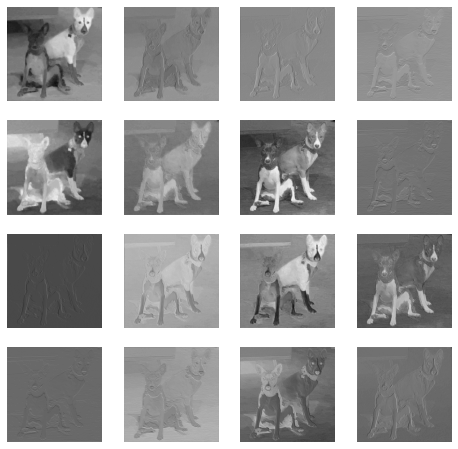

In [ ]:
plt.figure(figsize=(8, 8))
layer_viz = results[0][0, :, :, :]
layer_viz = layer_viz.data
print(layer_viz.size())
for i, filter in enumerate(layer_viz):
    plt.subplot(4, 4, i + 1)
    plt.imshow(filter.cpu(), cmap='gray')
    plt.axis("off")

torch.Size([32, 512, 512])


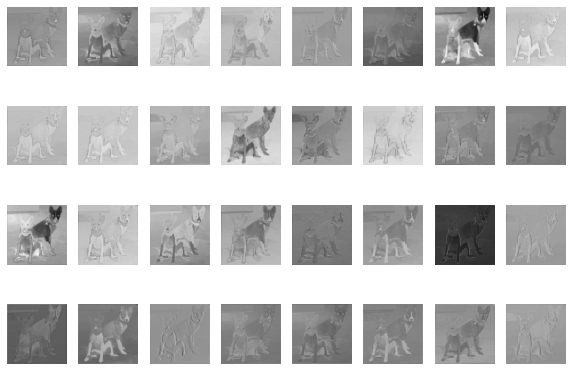

In [ ]:
plt.figure(figsize=(10, 7))
layer_viz = results[2][0, :, :, :]
layer_viz = layer_viz.data
print(layer_viz.size())
for i, filter in enumerate(layer_viz):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filter.cpu(), cmap='gray')
    plt.axis("off")

torch.Size([64, 256, 256])


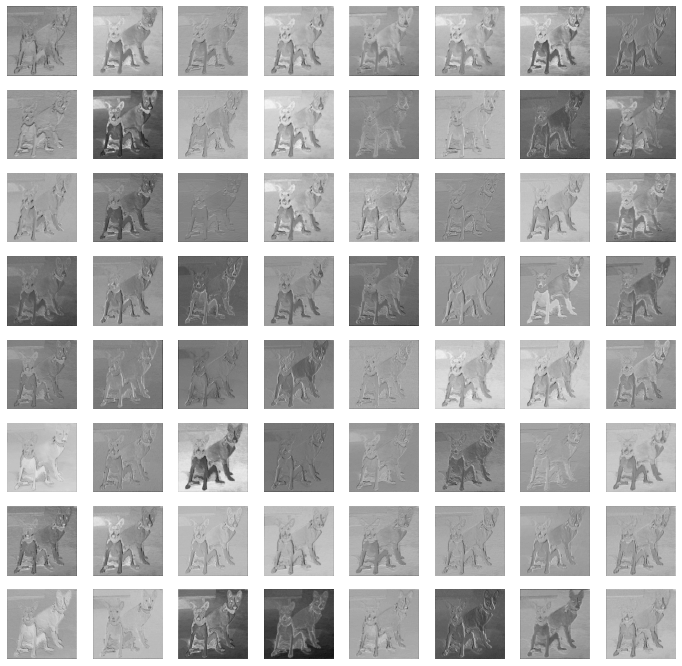

In [ ]:
plt.figure(figsize=(12, 12))
layer_viz = results[4][0, :, :, :]
layer_viz = layer_viz.data
print(layer_viz.size())
for i, filter in enumerate(layer_viz):
    plt.subplot(8, 8, i + 1)
    plt.imshow(filter.cpu(), cmap='gray')
    plt.axis("off")